<a href="https://colab.research.google.com/github/monsegutier/GRUPO-6-PROC.-DE-DATOS/blob/main/src/crear_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pobreza en Argentina**

En este trabajo se analiza la pobreza en Argentina de acuerdo a los datos de la Encuesta Permanente de Hogares (EPH). Las bases de datos que se toman en este caso son las del último trimestre del año 2022 (últimas disponibles).

De acuerdo a los ingresos de cada hogar y los datos de la canasta básica que proporciona INDEC se puede estimar el porcentaje de pobreza en Argentina.

Para calcular el ingreso del hogar se estima primero el porcentaje correspondiente al adulto equivalente en cada miembro del hogar, según género y edad, siguiendo las equivalencias dispuestas por INDEC (ver Cuadro 4 del archivo canasta_01_23DF5760FF57.pdf)

En este caso, la línea de pobreza para un adulto equivalente fue de $49.358.

Las fuentes de los bases de datos son:


**Bases de datos**

https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos


**Diseño de registro y estructura para las bases**

https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf


**Canasta básica alimentaria diciembre 2022**

https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf



# Importamos las librerías






In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

warnings.filterwarnings('ignore')

# 1- Recolección y preparación de datos:

## **Creamos el dataset**





## Carga de datos y creacion de Dataframes para trabajar

In [2]:
#cargamos el archivo de individuos "usu_individual_T422.csv"
individuos = 'https://raw.githubusercontent.com/monsegutier/GRUPO-6-PROC.-DE-DATOS/main/data/usu_individual_T422.csv'
# from google.colab import files
# uploaded  = files.upload()

In [3]:
#cargamos el archivo de hogares "usu_hogar_T422.csv"
hogares = 'https://raw.githubusercontent.com/monsegutier/GRUPO-6-PROC.-DE-DATOS/main/data/usu_hogar_T422.csv'
#from google.colab import files
#uploaded  = files.upload()

In [4]:
#creamos el dataframe individuos
#df_individual = pd.read_csv("usu_individual_T422.csv", sep=';')
df_individual = pd.read_csv(individuos, sep=';')

In [5]:
#creamos el dataframe hogares
#df_hogares = pd.read_csv("usu_hogar_T422.csv", sep=";")
df_hogares = pd.read_csv(hogares, sep=";")

## Dataframe checks

In [6]:
#medimos las dimensiones
print("Dimensiones de dataframe individuos:", df_individual.shape)
print("Dimensiones de dataframe hogares:", df_hogares.shape)


Dimensiones de dataframe individuos: (48545, 177)
Dimensiones de dataframe hogares: (16740, 88)


In [7]:
#vemos los primeros registros
print(df_individual.head())
print(df_hogares.head())

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOPRUHKMLSCDEGJBF00788920  2022          4          1           2    1   
1  TQRMNORSSHMMMLCDEGJBF00714103  2022          4          1           1    1   
2  TQRMNORSSHMMMLCDEGJBF00714103  2022          4          1           2    1   
3  TQRMNORSSHMMMLCDEGJBF00714103  2022          4          1           3    1   
4  TQRMNORQUHLMLOCDEFPCH00715601  2022          4          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      43       S          13      464  ...      NaN       12      0.00   
1      43       S          13      532  ...      NaN        7  61333.33   
2      43       S          13      532  ...      NaN        7  61333.33   
3      43       S          13      532  ...      NaN        7  61333.33   
4      44       N           9      348  ...      9.0        7  76666.67   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH

## Empezamos a trabajar los datasets

Para integrarlos, es necesario calcular el porcentaje de adulto equivalente de cada miembro del hogar, según edad y género, en el dataframe individuos  y luego integrarlo con el dataframe hogares


In [8]:
# le asignamos un % a cada persona que vive en el hogar según género y edad, en la variable 'AE_ctrol_ind'
# ver Cuadro 4 de canasta_01_23DF5760FF57.pdf

condiciones = [
    (df_individual ['CH04'] >= 1) & (df_individual['CH06'] < 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 2),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 3),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 4),
    (df_individual['CH04'] >= 1 ) & ( df_individual['CH06'] == 5),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 6),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 7),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 8),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 9),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] == 10),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] == 11),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] == 12),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 13) & (df_individual['CH06'] <=14),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 15) & (df_individual['CH06'] <=17),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] > 75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==10),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==11),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==12),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==13),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==14),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==15),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==16),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==17),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] > 75)
    ]

opciones = [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.70,0.72,0.74,0.76,0.77,0.76,0.77,0.76,0.67,0.63,0.79,0.82,0.85,0.90,
            0.96,1.00,1.03,1.04,1.02,1.00,1.00,0.83,0.74]



In [9]:
df_individual['AE_ctrol_ind']=np.select(condiciones,opciones)


In [10]:
df_individual.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,AE_ctrol_ind
0,TQRMNOPRUHKMLSCDEGJBF00788920,2022,4,1,2,1,43,S,13,464,...,12,0.00,12,12.0,12,12.0,NaN,12,0,1.02
1,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,1,1,43,S,13,532,...,7,61333.33,6,7.0,6,6.0,NaN,6,635,0.83
2,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,2,1,43,S,13,532,...,7,61333.33,6,7.0,6,6.0,NaN,6,635,0.67
3,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,3,1,43,S,13,532,...,7,61333.33,6,7.0,6,6.0,NaN,6,635,1.00
4,TQRMNORQUHLMLOCDEFPCH00715601,2022,4,1,1,1,44,N,9,348,...,7,76666.67,7,8.0,6,NaN,8.0,6,341,1.00


In [11]:
#seleccionamos solo las columnas que nos interesan para este estudio (ver archivo "EPH_disenoreg_09 disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf")

df_personas = df_individual[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH08','NIVEL_ED','CAT_OCUP','CAT_INAC','AE_ctrol_ind']]

In [12]:
df_personas.head(5)

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind
0,TQRMNOPRUHKMLSCDEGJBF00788920,1,2,1,22,2,4,3,0,1.02
1,TQRMNORSSHMMMLCDEGJBF00714103,1,1,1,73,1,5,0,1,0.83
2,TQRMNORSSHMMMLCDEGJBF00714103,1,2,2,69,1,5,0,1,0.67
3,TQRMNORSSHMMMLCDEGJBF00714103,1,3,1,40,3,1,3,0,1.00
4,TQRMNORQUHLMLOCDEFPCH00715601,1,1,1,58,1,1,3,0,1.00


In [13]:
#sumamos el % de cada persona que compone el hogar (las variables CODUSU y NRO_HOGAR identifican a cada hogar)

df_suma = df_personas.groupby(['CODUSU','NRO_HOGAR']).AE_ctrol_ind.sum()

In [14]:
df_suma.head(5)

CODUSU                         NRO_HOGAR
TQRMNOPPQHJKLLCDEFKID00798130  1            1.50
TQRMNOPPQHJLKUCDEFKID00796257  1            2.00
TQRMNOPPQHJMLOCDEHPJB00795718  1            3.79
TQRMNOPPQHJNLPCDEHJGH00793308  1            4.43
TQRMNOPPQHJNLTCDEFKID00798140  1            2.02
Name: AE_ctrol_ind, dtype: float64

In [15]:
df_suma.shape

(16740,)

In [16]:
#unimos los dos dataframes según las variables CODUSU y NRO_HOGAR

df_personas_suma = pd.merge(df_personas, df_suma, on=['CODUSU','NRO_HOGAR'])

In [17]:
df_personas_suma.head(5)

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_x,AE_ctrol_ind_y
0,TQRMNOPRUHKMLSCDEGJBF00788920,1,2,1,22,2,4,3,0,1.02,1.78
1,TQRMNOPRUHKMLSCDEGJBF00788920,1,1,2,24,2,6,3,0,0.76,1.78
2,TQRMNORSSHMMMLCDEGJBF00714103,1,1,1,73,1,5,0,1,0.83,2.50
3,TQRMNORSSHMMMLCDEGJBF00714103,1,2,2,69,1,5,0,1,0.67,2.50
4,TQRMNORSSHMMMLCDEGJBF00714103,1,3,1,40,3,1,3,0,1.00,2.50


In [18]:
#renombramos las columnas

df_personas_suma = df_personas_suma.rename(columns={
     'CH03':'parentesco(CH3)',
     'CH04':'genero(CH04)',
     'CH06':'edad(CH06)',
     'CH08':'cob_medica(CH08)',
     'AE_ctrol_ind_x':'AE_ctrol_ind',
     'AE_ctrol_ind_y':'AE_ctrol_ind_sum'})

In [19]:
df_personas_suma.head(2)

,CODUSU,NRO_HOGAR,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOPRUHKMLSCDEGJBF00788920,1,2,1,22,2,4,3,0,1.02,1.78
1,TQRMNOPRUHKMLSCDEGJBF00788920,1,1,2,24,2,6,3,0,0.76,1.78


In [20]:
df_personas_suma.shape

(48545, 11)

In [21]:
#seleccionamos solo los que cumplen la condición de jefes/as de hogar

df_personas_jefes = df_personas_suma.loc[df_personas_suma.loc[:, 'parentesco(CH3)'] == 1]

In [22]:
df_personas_jefes.head(5)

,CODUSU,NRO_HOGAR,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
1,TQRMNOPRUHKMLSCDEGJBF00788920,1,1,2,24,2,6,3,0,0.76,1.78
2,TQRMNORSSHMMMLCDEGJBF00714103,1,1,1,73,1,5,0,1,0.83,2.50
5,TQRMNORQUHLMLOCDEFPCH00715601,1,1,1,58,1,1,3,0,1.00,2.78
8,TQRMNOQWXHLMNOCDEIJAH00719609,2,1,1,31,4,3,3,0,1.00,4.10
13,TQSMNORXSHKLMUCDEIJAH00794113,1,1,1,49,4,5,2,0,1.00,4.33


In [23]:
#comprobamos la cantidad de filas

df_personas_jefes.shape

(16740, 11)

In [24]:
#exportamos el dataframe como .csv
df_personas_jefes.to_csv('df_personas_jefes.csv', sep=';', index=False)

In [25]:
#comprobamos la cantidad de filas

df_hogares.shape

(16740, 88)

Vemos que la cantidad de filas coincide con la del dataframe df_personas_jefes


In [26]:
#unimos los dos dataframes, que tienen la misma cantidad de filas, según las variables CODUSU y NRO_HOGAR

df_dataset = pd.merge(df_hogares, df_personas_jefes, on=['CODUSU','NRO_HOGAR'])

In [27]:
#comprobamos la cantidad de filas

df_dataset.shape

(16740, 97)

In [28]:
df_dataset.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,VII2_4,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,0,1,1,46,4,3,2,0,1.00,3.15
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,0,1,1,69,1,2,0,1,0.83,3.93


In [29]:
#la variable ITF representa el monto de ingreso total familiar (ver archivo "EPH_disenoreg_09 disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf")
#a este monto lo dividimos por la suma de % de las personas que residen en el hogar para obtener el ingreso por adulto equivalente

df_dataset['adulto_equivalente']= df_dataset.apply(lambda row: row.ITF/row.AE_ctrol_ind_sum, axis=1)

In [30]:
df_dataset['adulto_equivalente']= round(df_dataset['adulto_equivalente'], 2)

In [31]:
df_dataset.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,1,1,46,4,3,2,0,1.00,3.15,126984.13
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,1,1,69,1,2,0,1,0.83,3.93,0.00
2,TQRMNORRSHJMKMCDEOJAH00794456,2022,4,1,1,44,N,93,40,2,...,1,2,49,1,6,3,0,0.76,3.82,0.00
3,TQRMNOSVUHLMKNCDEOJAH00720329,2022,4,1,1,44,N,93,95,1,...,1,2,76,1,3,0,1,0.63,0.63,146031.75
4,TQRMNOSQWHJOKNCDEOJAH00794457,2022,4,1,1,44,N,93,89,1,...,1,2,44,1,6,3,0,0.77,2.56,19531.25


In [32]:
#creamos la variable objetivo, pobreza

"""
De acuerdo con el archivo "canasta_01_23DF5760FF57" (disponible en https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf)
la canasta básica total para un adulto equivalente, para que no ingrese en la línea de pobreza, es de $49.6358.

Creamos la varibale pobreza, donde todos los hogares que tengan ingresos menores a este valor son pobres.
"""

df_dataset['pobreza'] = np.where(df_dataset['adulto_equivalente']<49358,1,0)


In [33]:
df_dataset['pobreza'].value_counts()

1    8549
0    8191
Name: pobreza, dtype: int64

In [34]:
df_dataset.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,1,46,4,3,2,0,1.00,3.15,126984.13,0
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,1,69,1,2,0,1,0.83,3.93,0.00,1
2,TQRMNORRSHJMKMCDEOJAH00794456,2022,4,1,1,44,N,93,40,2,...,2,49,1,6,3,0,0.76,3.82,0.00,1
3,TQRMNOSVUHLMKNCDEOJAH00720329,2022,4,1,1,44,N,93,95,1,...,2,76,1,3,0,1,0.63,0.63,146031.75,0
4,TQRMNOSQWHJOKNCDEOJAH00794457,2022,4,1,1,44,N,93,89,1,...,2,44,1,6,3,0,0.77,2.56,19531.25,1


In [35]:
df_dataset.to_csv('dataset.csv')

In [36]:
#la variable ITF representa el monto de ingreso total familiar
#analizamos si hay valores 0 en la variable ITF
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

3739

In [37]:
#hay 3.739 hogares que declararon ingresos $0, para este estudio no los vamos a tener en cuenta
#creamos un nuevo dataframe sin esos valores

df_dataset_sinITF0 = df_dataset.drop(df_dataset[df_dataset['ITF']==0].index)

In [38]:
ITF_cero = [x for x in df_dataset_sinITF0['ITF'] if x == 0]
len(ITF_cero)

0

In [39]:
# Calculamos el porcentaje de pobreza
# Contar los valores únicos en la columna 'pobreza'
counts = df_dataset_sinITF0['pobreza'].value_counts()

In [40]:
# Porcentaje de pobreza
porcentaje_pobreza = counts[1] / len(df_dataset_sinITF0) * 100

print(f'El porcentaje de pobreza es {porcentaje_pobreza:.2f}%')

El porcentaje de pobreza es 37.00%


In [41]:
#seleccionamos los hogares que están por debajo de la línea de pobreza
df_pobres = df_dataset_sinITF0[df_dataset_sinITF0['pobreza'] == 1]

In [42]:
df_pobres.to_csv('dataset_hblp.csv')

# 2 - Análisis exploratorio de datos:

In [44]:
## cargamos el archivo csv generado en el punto anterior y creamos el dataset "hblp" (hogares bajo linea de pobreza)


hblp = 'https://raw.githubusercontent.com/monsegutier/GRUPO-6-PROC.-DE-DATOS/main/data/dataset_hblp.csv'
df_hblp = pd.read_csv(hblp, sep=',')

## dataframe checks

print("Dimensiones de dataframe hblp:", df_hblp.shape)
print(df_hblp.head())

Dimensiones de dataframe hblp: (4810, 100)
   Unnamed: 0                         CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  \
0           4  TQRMNOSQWHJOKNCDEOJAH00794457  2022          4          1   
1           6  TQRMNOQVSHKMKPCDEOJAH00793041  2022          4          1   
2           7  TQRMNOQPXHKKKQCDEOJAH00793105  2022          4          1   
3          11  TQRMNOQTYHLMKRCDEFLID00714984  2022          4          1   
4          18  TQRMNORVPHMMTRCDEIJAH00719603  2022          4          1   

   REALIZADA  REGION MAS_500  AGLOMERADO  PONDERA  ...  genero(CH04)  \
0          1      44       N          93       89  ...             2   
1          1      44       N          93       99  ...             1   
2          1      44       N          93      138  ...             2   
3          1      43       S           5      359  ...             2   
4          1       1       S          33     1410  ...             1   

  edad(CH06)  cob_medica(CH08)  NIVEL_ED CAT_OCUP  CAT_INAC  AE_ctr

Realizamos graficos para ver como estan distribuidos los hogares segun la region de residencia

Text(0, 0.5, 'Cant hogares que están debajo de la línea de pobreza')

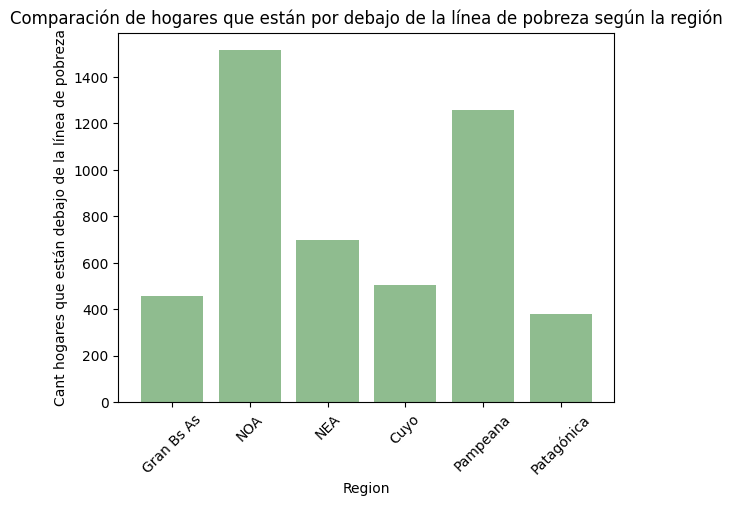

In [45]:
#grafico para observar la cantidad de hogares pobres en  cada region que se realiza la encuesta,
x= sorted(df_hblp ['REGION'].unique()) #indicamos que variable se utiliza en el eje X, sorted me ordena en forma ascendente
etiquetas = ["Gran Bs As","NOA","NEA","Cuyo","Pampeana","Patagónica"] #etiquetas es para nombrar cada region en el eje
alturas = df_hblp .groupby('REGION')['pobreza'].sum() # indicamos cual es la variable que se utiliza en el eje y

# Crear el gráfico de barras
plt.bar(range(len(x)), alturas, color = "darkseagreen") #con range(len()) indicamos que nuestra variable es categorica

# Personalizar los ejes
plt.xticks(range(len(x)), etiquetas,rotation=45) #indicamos que nombre le pone a las columnas

plt.title('Comparación de hogares que están por debajo de la línea de pobreza según la región')
plt.xlabel('Region')
plt.ylabel('Cant hogares que están debajo de la línea de pobreza')

Text(0.5, 0, 'Cant hogares que están debajo de la línea de pobreza')

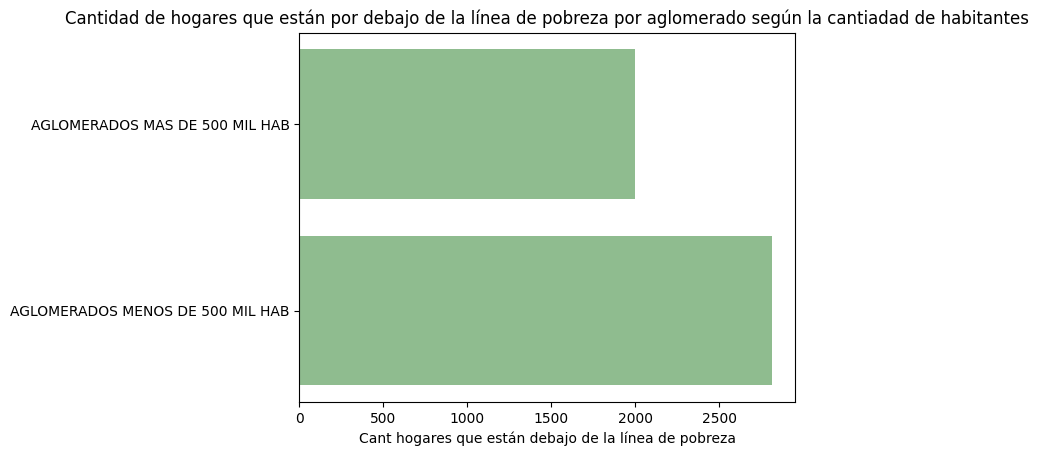

In [46]:
x = sorted (df_hblp ['MAS_500'].unique())
etiquetas = ["AGLOMERADOS MENOS DE 500 MIL HAB","AGLOMERADOS MAS DE 500 MIL HAB"]
alturas = df_hblp .groupby('MAS_500')['pobreza'].sum()
plt.barh(x, alturas, tick_label = etiquetas, color = "darkseagreen")
plt.title('Cantidad de hogares que están por debajo de la línea de pobreza por aglomerado según la cantiadad de habitantes')
plt.xlabel('Cant hogares que están debajo de la línea de pobreza')

NIVEL_ED
1     418
2    1110
3    1051
4    1281
5     523
6     382
7      45
Name: pobreza, dtype: int64


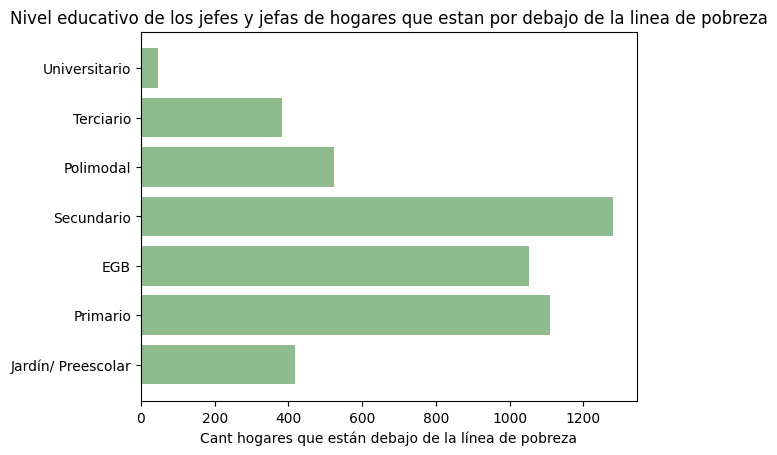

In [63]:
x = sorted (df_hblp ['NIVEL_ED'].unique())
etiquetas =["Jardín/ Preescolar","Primario","EGB","Secundario","Polimodal","Terciario","Universitario" ]# Posgrado Univ y Educación especial (discapacitado) son 0
alturas = df_hblp .groupby('NIVEL_ED')['pobreza'].sum()

plt.barh(x, alturas,tick_label = etiquetas, color = "darkseagreen")
plt.title('Nivel educativo de los jefes y jefas de hogares que estan por debajo de la linea de pobreza')
plt.xlabel('Cant hogares que están debajo de la línea de pobreza')

plt.show()

[1, 2, 3, 4, 9, 12, 13]
cob_medica(CH08)
1     2558
2       80
3      161
4     1985
9        2
12      22
13       2
Name: pobreza, dtype: int64


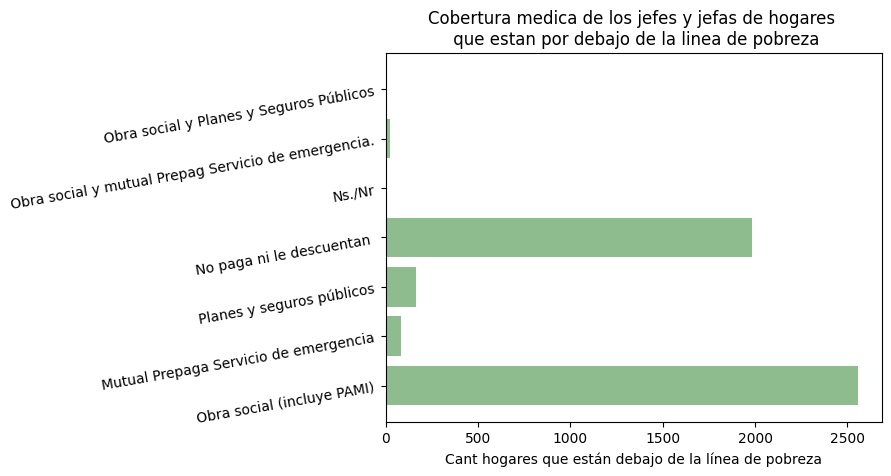

In [99]:
x = sorted (df_hblp ['cob_medica(CH08)'].unique())
print(x)
etiquetas = ["Obra social (incluye PAMI)","Mutual Prepaga Servicio de emergencia","Planes y seguros públicos","No paga ni le descuentan ","Ns./Nr",
             "Obra social y mutual Prepag Servicio de emergencia."," Obra social y Planes y Seguros Públicos"]
alturas = df_hblp .groupby('cob_medica(CH08)')['pobreza'].sum()
print(alturas)

plt.barh(range(len(x)), alturas, tick_label = etiquetas, color = "darkseagreen",)
plt.yticks(range(len(x)), etiquetas,rotation=10)
plt.title('Cobertura medica de los jefes y jefas de hogares \n que estan por debajo de la linea de pobreza')
plt.xlabel('Cant hogares que están debajo de la línea de pobreza')
plt.show()


Estadisticas descriptivas Edad y Ingresos Familiares

In [71]:
estadisticas_edad = df_hblp['edad(CH06)'].describe() #estadisticas descriptivas de la edade de los jefes de hogares
print(estadisticas_edad)
estadisticas_ITF = df_hblp['ITF'].describe() #estadisticas descriptivas deL Ingreso total familiar
moda = df_hblp['ITF'].mode()
print(estadisticas_ITF)


count    4810.000000
mean       46.761954
std        14.438391
min        17.000000
25%        36.000000
50%        45.000000
75%        57.000000
max        95.000000
Name: edad(CH06), dtype: float64
count      4810.000000
mean      96186.088773
std       52931.704203
min         400.000000
25%       58000.000000
50%       89000.000000
75%      125000.000000
max      426776.000000
Name: ITF, dtype: float64
0    80000
Name: ITF, dtype: int64


# 3 - Procesamiento y análisis de datos:

# 4 - Visualización de datos:

# 5 - Comunicación efectiva de resultados: